In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('Ahmedabad_final.csv')

In [22]:
df.head()

,Unnamed: 0,T,TM,Tm,H,PP,VV,V,VM,PM2.5
0,0,19.2,29.4,11.0,47,0.0,4.3,5.9,13.0,94.52
1,1,23.8,32.0,14.0,41,0.0,4.3,4.4,11.1,135.99
2,2,22.1,31.0,14.0,57,0.0,3.9,3.3,14.8,178.33
3,3,22.2,30.0,15.0,57,0.0,4.0,5.6,13.0,139.70
4,4,22.4,32.0,15.0,44,0.0,4.3,4.3,11.1,88.70


In [23]:
df = df.drop(columns=['Unnamed: 0'])

In [24]:
df.head()

,T,TM,Tm,H,PP,VV,V,VM,PM2.5
0,19.2,29.4,11.0,47,0.0,4.3,5.9,13.0,94.52
1,23.8,32.0,14.0,41,0.0,4.3,4.4,11.1,135.99
2,22.1,31.0,14.0,57,0.0,3.9,3.3,14.8,178.33
3,22.2,30.0,15.0,57,0.0,4.0,5.6,13.0,139.70
4,22.4,32.0,15.0,44,0.0,4.3,4.3,11.1,88.70


In [25]:
df = df.apply(pd.to_numeric,errors='coerce')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       725 non-null    float64
 1   TM      725 non-null    float64
 2   Tm      725 non-null    float64
 3   H       725 non-null    int64  
 4   PP      725 non-null    float64
 5   VV      725 non-null    float64
 6   V       725 non-null    float64
 7   VM      725 non-null    float64
 8   PM2.5   725 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 51.1 KB


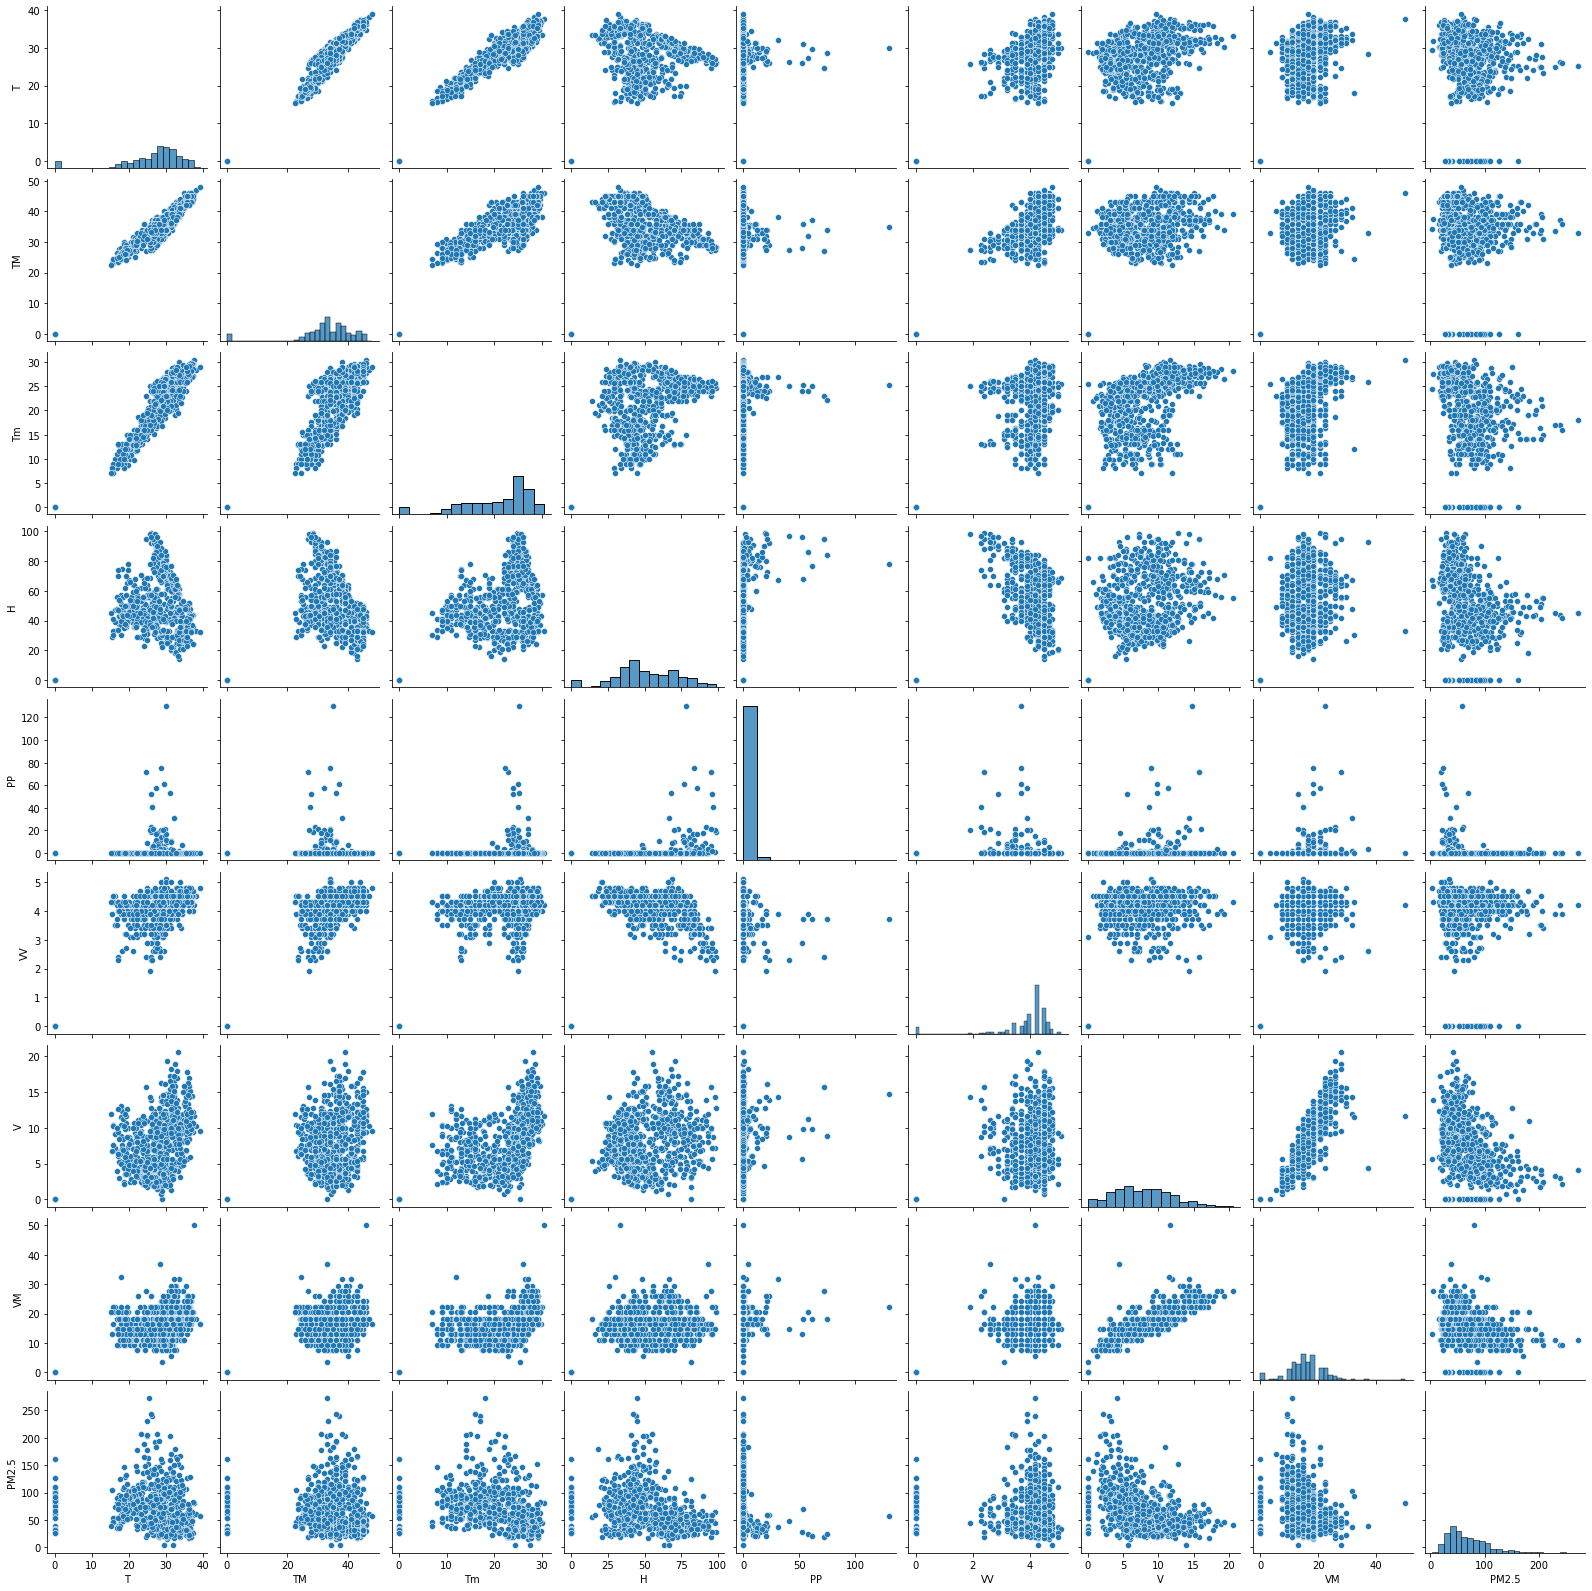

In [27]:
sns.pairplot(df)

In [28]:
df.corr()

,T,TM,Tm,H,PP,VV,V,VM,PM2.5
T,1.000000,0.963590,0.933373,0.364651,0.031840,0.768022,0.503847,0.589106,-0.168851
TM,0.963590,1.000000,0.817620,0.225843,-0.014567,0.840013,0.417614,0.551024,-0.041471
Tm,0.933373,0.817620,1.000000,0.539244,0.092946,0.588232,0.589351,0.604548,-0.326137
H,0.364651,0.225843,0.539244,1.000000,0.252272,0.212163,0.361607,0.352087,-0.306132
PP,0.031840,-0.014567,0.092946,0.252272,1.000000,-0.093242,0.141187,0.122464,-0.130607
VV,0.768022,0.840013,0.588232,0.212163,-0.093242,1.000000,0.377719,0.505438,-0.049930
V,0.503847,0.417614,0.589351,0.361607,0.141187,0.377719,1.000000,0.843823,-0.461696
VM,0.589106,0.551024,0.604548,0.352087,0.122464,0.505438,0.843823,1.000000,-0.339261
PM2.5,-0.168851,-0.041471,-0.326137,-0.306132,-0.130607,-0.049930,-0.461696,-0.339261,1.000000


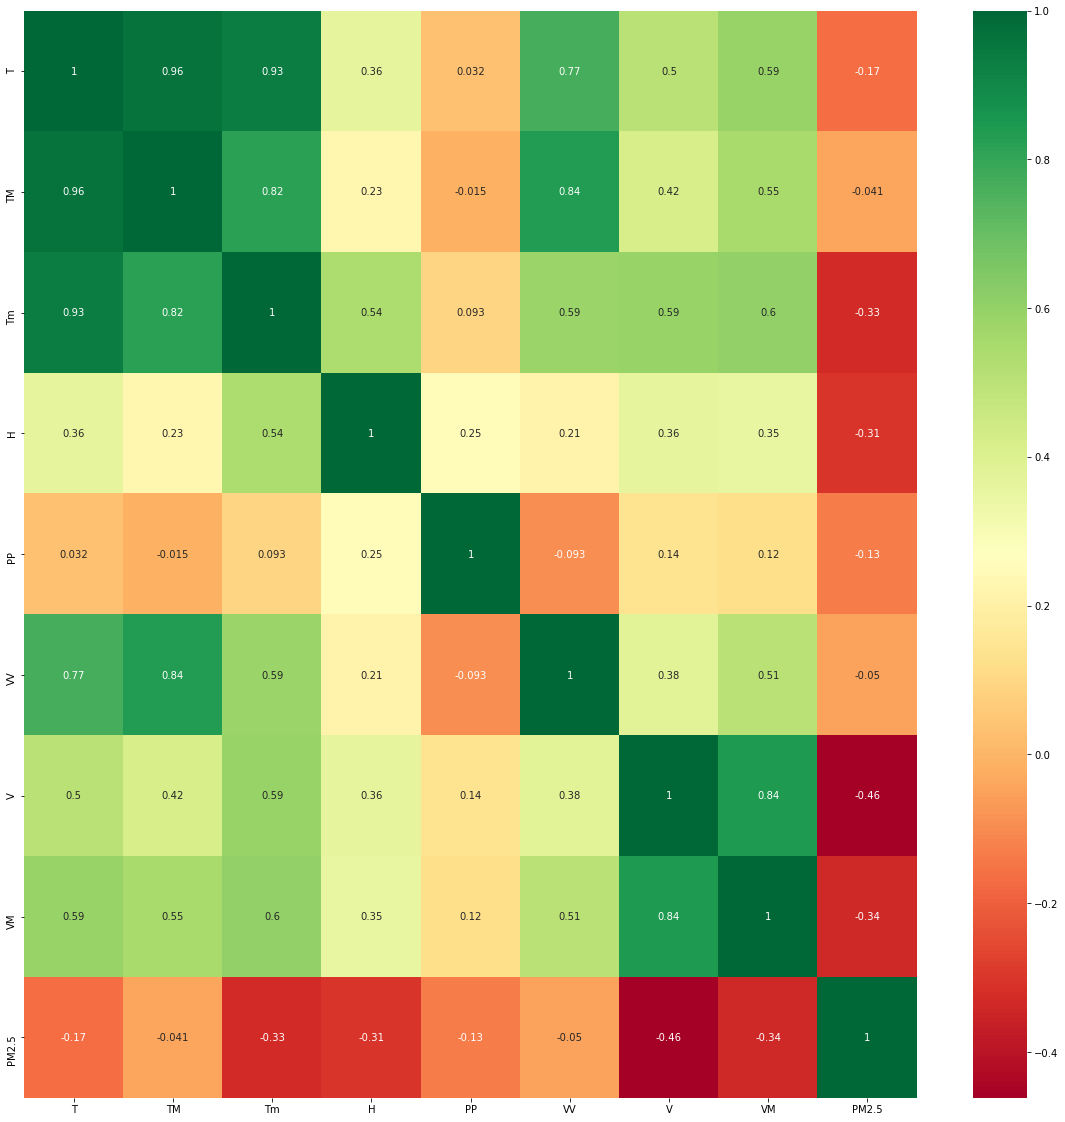

In [29]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [35]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [39]:
f'Coefficient of determination R^2 on train set {lin_reg.score(X_train, y_train)}'


'Coefficient of determination R^2 on train set 0.34516351108295895'

In [40]:
f'Coefficient of determination R^2 on test set {lin_reg.score(X_test, y_test)}'


'Coefficient of determination R^2 on test set 0.39429114813001587'

In [41]:
lin_reg.coef_


array([ -0.72040235,   4.89562718,  -4.26387371,   0.21176779,
        -0.20825323, -14.12285523,  -2.45549504,   0.01731075])

In [42]:
lin_reg.intercept_


76.34157971691094

In [43]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, y, cv = 3)

In [44]:
score.mean()


0.04442135828846187

In [45]:
pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coeff'])

,Coeff
T,-0.720402
TM,4.895627
Tm,-4.263874
H,0.211768
PP,-0.208253
VV,-14.122855
V,-2.455495
VM,0.017311


In [46]:
c = 0
for val in lin_reg.coef_:
    effect = 'increase' if val>0 else 'decrease'
    print(f'Holding all other features fixed a 1 unit increase in {X.columns[c]} is associated with {effect} of val in AQI PM2.5')
    c = c+1

Holding all other features fixed a 1 unit increase in T is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in TM is associated with increase of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in Tm is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in H is associated with increase of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in PP is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in VV is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in V is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in VM is associated with increase of val in AQI PM2.5


In [47]:
pred = lin_reg.predict(X_test)

C:\Users\okabe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

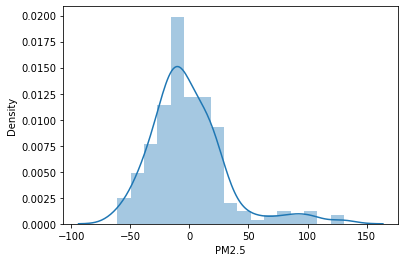

In [48]:
sns.distplot(y_test - pred)

In [49]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 23.196765983269103
Mean Sq Error: 1025.479238584599
Root Mean Error: 32.023104761790336


In [50]:
import pickle
pickle.dump(lin_reg, open('linreg.pkl', 'wb'))

# Lasso regression

In [51]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [52]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\okabe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239048.62825055423, tolerance: 74.04541026308621
  model = cd_fast.enet_coordinate_descent(
C:\Users\okabe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255082.45959308933, tolerance: 77.67667217834483
  model = cd_fast.enet_coordinate_descent(
C:\Users\okabe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288956.101669697, tolerance: 89.47356729687934
  model = cd_fast.enet_coordinate_descent(
C:\Users\okabe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

{'alpha': 1}
-1084.6747208187617


In [53]:
prediction=lasso_regressor.predict(X_test)

C:\Users\okabe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

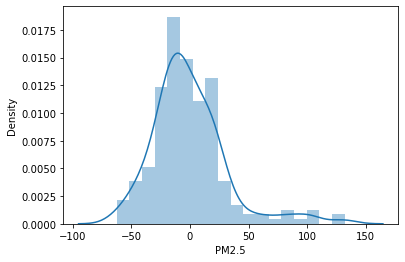

In [54]:
sns.distplot(y_test-prediction)

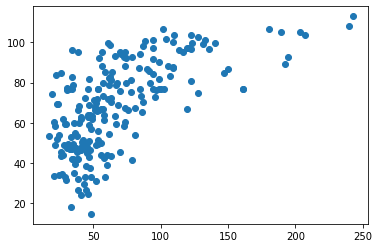

In [55]:
plt.scatter(y_test,prediction)

In [56]:
from sklearn import metrics

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 22.9476459275878
MSE: 1012.2837960749162
RMSE: 31.81640765509073


In [58]:
pickle.dump(lin_reg, open('lasso.pkl', 'wb'))

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
regressor = DecisionTreeRegressor(random_state=0)

In [65]:
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')


In [67]:
with open('linreg.pkl', 'rb') as file:
    data = pickle.load(file)